# Критерий Манна - Уитни

## Создай функции графиков распределения и критерия Мана - Уитни

In [56]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [57]:
## Создаем функцию графиков распределения
def generate_distribution_histogram(dataframe, 
                                    column_name, 
                                    title, x_axis_label, y_axis_label,
                                    label_name,
                                    number_bins = 15):
    """
    This function generates a histogram.
    Args:
        dataframe:
        column_name: String. Name of the column whose distribution we
        want to visualize.
        title: String. Title of the histogram.
        x_axis_label: String. X-axis label.
        y_axis_label: String. Y-axis label.
    Outputs:
        Histogram containing distribution for specific column column_name.
    """
    plt.hist(dataframe[column_name], bins = number_bins, label = label_name)
    plt.title(title)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.legend(loc='upper right')

In [58]:
## Создаем функцию критерия Мана - Уитни
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. First distribution that we want to compare.
       distribution_2: List. Second distribution that we want to compare.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float. p-value for the test.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    #Print the results
    print('U-Statistic: ', u_statistic)
    print('p-value: ', p_value)
    return u_statistic, p_value

In [59]:
### Загружаем данные
df1 = pd.read_csv('кол_во_атакующих_стратифицированная_случайная_выборка_18_инцидентов_рукопашный_бой.csv')
### Загружаем данные
df2 = pd.read_csv('кол_во_атакующих_стратифицированная_случайная_выборка_18_инцидентов_саботаж.csv')

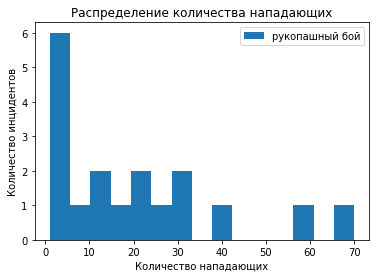

In [60]:
# Распределение количества нападающих - рукопашный бой
generate_distribution_histogram(df1, 'nperps',
                                    title = 'Распределение количества нападающих',
                                    x_axis_label = 'Количество нападающих',
                                    y_axis_label = 'Количество инцидентов',
                                    label_name = 'рукопашный бой')

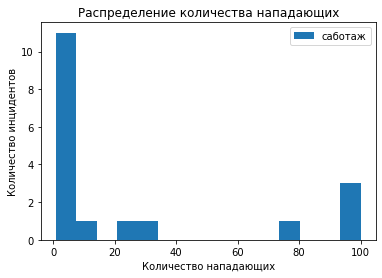

In [61]:
# Распределение количества нападающих - саботаж
generate_distribution_histogram(df2, 'nperps',
                                    title = 'Распределение количества нападающих',
                                    x_axis_label = 'Количество нападающих',
                                    y_axis_label = 'Количество инцидентов',
                                    label_name = 'саботаж')

In [62]:
# Группа 1 - рукопашный бой
# Группа 2 - саботаж
group1 = df1
group2 = df2

In [63]:
# Группа 1 - рукопашный бой
group1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,fight
0,200612310008,2006,12,31,NaN,0,NaN,141,Nepal,6,...,"""JTMM opens fire on Kantipur vehicle,"" ekantip...",NaN,NaN,UMD JTMM Nepal 2012,0,0,0,0,NaN,рукопашный бой
1,201705240049,2017,5,24,NaN,0,NaN,78,Greece,8,...,"""Anarchists upset student union elections, one...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,рукопашный бой
2,201511110065,2015,11,11,NaN,0,NaN,603,United Kingdom,8,...,"""Attack on Catholic home blamed on loyalist ga...",NaN,NaN,START Primary Collection,0,0,1,1,NaN,рукопашный бой
3,199107120014,1991,7,12,NaN,0,NaN,142,Netherlands,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,рукопашный бой
4,201808260015,2018,8,25,NaN,0,NaN,78,Greece,8,...,"""State PAO: Greece: Daily Media Roundup Monday...",NaN,NaN,START Primary Collection,0,0,0,0,NaN,рукопашный бой


In [64]:
# Группа 2 - саботаж
group2.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,fight
0,198810250013,1988,10,25,"October 25-26, 1988",0,NaN,217,United States,1,...,"FBI, ""Terrorism in the United States: 1988,"" T...","Angela Astle, ""Sabotage of ski lift detailed i...","""The charges against Earth First! Members- a c...",Eco Project 2010,0,0,0,0,NaN,саботаж
1,201707280045,2017,7,28,NaN,0,NaN,54,Czech Republic,9,...,"""Revision: Prague - Czech 'fake jihadist' face...","""Man caused train crashes then left Arabic mes...","""Terrorism Digest 13-14 January 2019,"" BBC Mon...",START Primary Collection,-9,-9,0,-9,NaN,саботаж
2,201810070039,2018,10,7,NaN,0,NaN,75,Germany,8,...,"""Terrorism Digest: 28-29 October 2018,"" BBC Mo...","""Germany: Islamic Bulletin for 24-30 October 2...",NaN,START Primary Collection,-9,-9,0,-9,NaN,саботаж
3,198711070018,1987,11,7,NaN,0,NaN,217,United States,1,...,"FBI, ""Terrorism in the United States: 1988,"" T...","Angela Astle, ""Sabotage of ski lift detailed i...","Charlene Smith, ""Environmental Activists Sente...",Eco Project 2010,0,0,0,0,NaN,саботаж
4,198905300021,1989,5,30,NaN,0,NaN,217,United States,1,...,"FBI, ""Terrorism in the United States: 1989,"" T...","""Four Environmentalists Arrested on Nuclear Sa...",NaN,Eco Project 2010,0,0,0,0,NaN,саботаж


In [65]:
# размер Группы 1 - рукопашный бой
group1.shape

(18, 136)

In [66]:
# размер Группы 2 - саботаж
group2.shape

(18, 136)

# Посмотрим распредления 

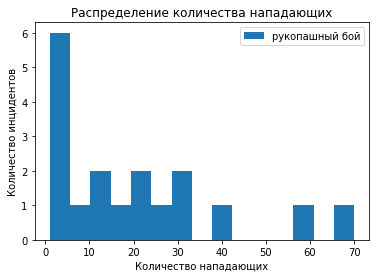

In [67]:
# Распределение количества нападающих - рукопашный бой
generate_distribution_histogram(group1, 'nperps',
                                    title = 'Распределение количества нападающих',
                                    x_axis_label = 'Количество нападающих',
                                    y_axis_label = 'Количество инцидентов',
                                    label_name = 'рукопашный бой')

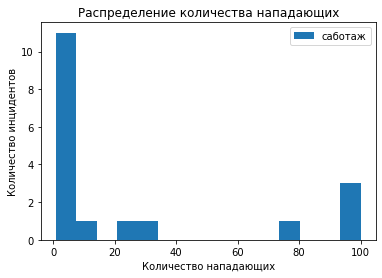

In [68]:
# Распределение количества нападающих - саботаж
generate_distribution_histogram(group2, 'nperps',
                                    title = 'Распределение количества нападающих',
                                    x_axis_label = 'Количество нападающих',
                                    y_axis_label = 'Количество инцидентов',
                                    label_name = 'саботаж')

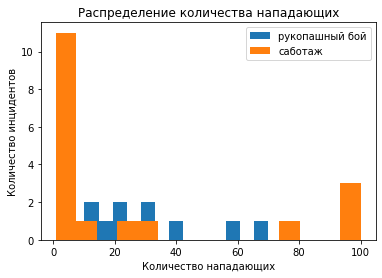

In [69]:
# Распределение количества нападающих - рукопашный бой
# Распределение количества нападающих - саботаж
generate_distribution_histogram(group1, 'nperps',
                                    title = 'Распределение количества нападающих',
                                    x_axis_label = 'Количество нападающих',
                                    y_axis_label = 'Количество инцидентов',
                                    label_name = 'рукопашный бой')

generate_distribution_histogram(group2, 'nperps',
                                    title = 'Распределение количества нападающих',
                                    x_axis_label = 'Количество нападающих',
                                    y_axis_label = 'Количество инцидентов',
                                    label_name = 'саботаж')

In [70]:
# количество нападающих группа 1 - рукопашный бой
list(group1['nperps'])

[5.0,
 20.0,
 3.0,
 70.0,
 4.0,
 60.0,
 28.0,
 12.0,
 1.0,
 15.0,
 30.0,
 3.0,
 14.0,
 8.0,
 40.0,
 20.0,
 30.0,
 1.0]

In [71]:
# количество нападающих группа 2 - саботаж
list(group2['nperps'])

[4.0,
 1.0,
 1.0,
 4.0,
 2.0,
 100.0,
 100.0,
 1.0,
 3.0,
 80.0,
 1.0,
 10.0,
 100.0,
 30.0,
 4.0,
 1.0,
 25.0,
 1.0]

In [72]:
mann_whitney_u_test(list(group2['nperps']), list(group1['nperps']))

U-Statistic:  129.5
p-value:  0.15398778302183613


(129.5, 0.15398778302183613)

## Статистическая значимость p = 0.15, так как p > 0.05, то нулевая гипотеза о том, что группы не имеют различий подтверждается.  